<center><img src="https://i.imgur.com/YNtjmbq.png" width="800"></center> 

# Práctica 1 – Introducción al uso de los Programas para Redes


<img align="right" width="500" height="100" src="https://i.imgur.com/vxZjEn1.png">

Para trabajar con grafos (redes) hay una serie de programas que podemos utilizar. La gran diferencia radica en el tamaño del archivo que pueden manejar (complejidad de la red), en el costo del programa, la cantidad y actualización de funciones (algoritmos) implementados, y en si requieren o no programación.



## **ESTRUCTURA DE DATOS**

Veamos la imagen de un grafo en [wikipedia](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/440px-6n-graf.svg.png"/>

De aquí notamos dos componentes básicos: los nodos (_vertex_) y los enlaces (_edges_). Los enlaces mostrados no tienen direccionalidad (flechas), pero pueden tenerla cuando queremos tener un grafo dirigido. Las redes son grafos, pero es una palabra más familiar que usaremos en nuestras sesiones.

Como podemos tener una gran cantidad de nodos y enlaces, hay que saber elegir la estructura y la herramienta apropiada para crear una red. Por ejemplo, en esta hoja de calculo podemos ver los datos que utilizó Adolfo Figueroa en su artículo "_Competition and circulation of economic elites: Theory and application to the case of Peru_" del 2007, en dos formatos, la matriz de adyacencia (**adjancency matrix**) y la lista de enlaces (**edgelist**):

In [2]:
%%html
<iframe src="https://docs.google.com/spreadsheets/d/e/2PACX-1vReqFHgPvGpZiSozcooJkZOH7kOCvtpgtq0fvuIehQ6MfqM-To93umwRY0pJBZzoCetj_ptmLCpNnGv/pubhtml?widget=true&amp;headers=false" width="900" height="500"></iframe>

Veamos como esas hojas simples pueden convertirse en redes.

# LECTURA DE DATOS

## NETWORKX

_Networkx_ es una librería de Python, un poderoso lenguaje de programación usado por cientistas de datos. Por ello podría instalar Python primero en su computadora (se recomienda [ANACONDA](https://www.anaconda.com/download)). Ello no es necesario si desea usar la versión de Python que ofrece GOOGLE, [Colab](https://colab.research.google.com/).

Si ya está en COLAB, preparese para leer los datos. La tabla antes mostrada, ya almacenada en Google Drive, puede ser utilizada directamente en Python (sea Anaconda o Colab) si contamos con el link:

* Paso 1: _Compartir_ y _Publicar_ tabla en la web:
  
<img src="https://i.imgur.com/oYjaJR1.jpg" width="300"/>

* Paso 2: Obtener el link

<img src="https://i.imgur.com/TAaNxlo.jpg" width="300"/>

La <ins>primera vez</ins> que haga el paso 2, debe presionar la opción "_Publicar_" (aqui ya aparece como _"Publicado"_)

A continuación, si está usando Python, puede guardar el link en Python de manera sencilla:

In [5]:
# link a google sheets entre "comillas" 
LinkToGoogle="https://docs.google.com/spreadsheets/d/e/2PACX-1vReqFHgPvGpZiSozcooJkZOH7kOCvtpgtq0fvuIehQ6MfqM-To93umwRY0pJBZzoCetj_ptmLCpNnGv/pub?output=xlsx"


Leamos la matriz de adyacencia, para lo cual primero leemos la tabla usando el link en con la libreria _pandas_:

In [6]:
# leyendo matriz de adyacencia

import pandas as pd

adjacency=pd.read_excel(LinkToGoogle, # link a la tabla
                        index_col=0,  # la columna '0' guarda los nombres
                        sheet_name='adjacency') # la tabla tiene este nombre

El objeto **adjancency** guarda la tabla. Ahora se activa la librería **networkx**, y se crea la red:

In [7]:
# activar networkx 
import networkx as nx

# crear red
eliteFromAdjacency=nx.from_pandas_adjacency(adjacency)

La red ya está creada, veamos:

In [8]:
# nodos de la red
eliteFromAdjacency.nodes(data=True)

NodeDataView({'Romero': {}, 'Graña': {}, 'Miro Quesada': {}, 'Moreyra': {}, 'Fort': {}, 'De La Puente': {}, 'Wiese': {}, 'Onrubia': {}, 'Brescia': {}, 'Nicolini': {}, 'Montero': {}, 'Picaso': {}, 'Bentin': {}, 'Benavides': {}, 'Bustamante': {}, 'Woodman Pollit': {}, 'Raffo': {}, 'Piazza': {}, 'Berckemeyer': {}, 'Llosa Barber': {}, 'Beoutis Ledesma': {}, 'Rizo Patron': {}, 'Montori': {}, 'Sotomayor': {}, 'Cilloniz': {}, 'Ferreyros': {}, 'Michell': {}, 'Wong Lu': {}, 'Batievsky Spack': {}, 'Matos Escalada': {}, 'Galsky': {}, 'Lucioni': {}, 'Rodriguez Rodríguez': {}, 'Custer': {}, 'Ikeda': {}, 'Cogorno': {}, 'Arias Davila': {}})

In [9]:
# enlaces de la red
eliteFromAdjacency.edges(data=True)

EdgeDataView([('Romero', 'Graña', {'weight': 1}), ('Romero', 'Miro Quesada', {'weight': 1}), ('Romero', 'Moreyra', {'weight': 1}), ('Romero', 'Fort', {'weight': 1}), ('Romero', 'De La Puente', {'weight': 1}), ('Romero', 'Onrubia', {'weight': 1}), ('Romero', 'Brescia', {'weight': 1}), ('Romero', 'Nicolini', {'weight': 1}), ('Romero', 'Bentin', {'weight': 1}), ('Romero', 'Benavides', {'weight': 1}), ('Romero', 'Bustamante', {'weight': 1}), ('Romero', 'Woodman Pollit', {'weight': 1}), ('Romero', 'Raffo', {'weight': 1}), ('Romero', 'Piazza', {'weight': 1}), ('Romero', 'Berckemeyer', {'weight': 1}), ('Romero', 'Llosa Barber', {'weight': 1}), ('Romero', 'Rizo Patron', {'weight': 1}), ('Romero', 'Montori', {'weight': 1}), ('Graña', 'Miro Quesada', {'weight': 1}), ('Graña', 'Fort', {'weight': 1}), ('Graña', 'De La Puente', {'weight': 1}), ('Graña', 'Wiese', {'weight': 1}), ('Graña', 'Montero', {'weight': 1}), ('Graña', 'Benavides', {'weight': 1}), ('Graña', 'Bustamante', {'weight': 1}), ('Grañ

## UCINET


UCINET es un software de análisis de redes sociales desarrollado por Steve Borgatti, Martin Everett y Linton Freeman. El nombre "UCINET" proviene de "University of California at Irvine NETwork".  Para poder empezar, necesitas tener UCINET instalado en tu computadora. Puedes descargarlo desde el sitio web oficial de [UCINET](https://sites.google.com/site/ucinetsoftware/download?authuser=0) y seguir las instrucciones para la instalación. Recuerda que UCINET sólo funciona en Windows, y es un software de pago (puede usarlo sin pagar por tres meses).

Si ya instaló UCINET, ejecútelo y verá esta pantalla:

<img src="https://i.imgur.com/GVyrPUl.png" width="900"/>


Para importar una tabla debemos leer el archivo en Excel, en este caso debes descargar el archivo de Google como Excel. Para ello puedes ir a este [enlace](https://drive.google.com/drive/folders/1QXy0RwgNUBryirnVx0-_-rfr3WZxSld5?usp=sharing).


. Esto puede implicar la creación de una matriz de adyacencia o la importación de un archivo de datos existente.
• Para importar datos, ve a Data > Import > Spreadsheet... y selecciona el archivo que deseas importar.

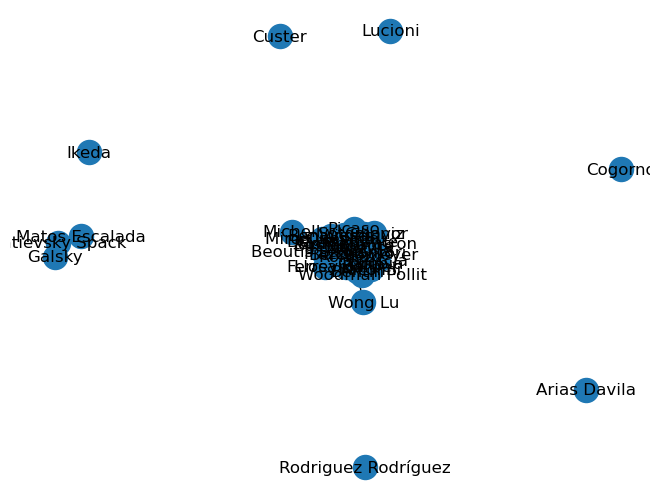

In [5]:
nx.draw(eliteFromAdjacency,with_labels=True)

In [13]:
# pip install netwulf

({'xlim': [0, 715],
  'ylim': [0, 715],
  'linkColor': '#7c7c7c',
  'linkAlpha': 0.5,
  'nodeStrokeColor': '#555555',
  'nodeStrokeWidth': 1,
  'links': [{'source': 'Romero', 'target': 'Graña', 'width': 2, 'weight': 1},
   {'source': 'Romero', 'target': 'Miro Quesada', 'width': 2, 'weight': 1},
   {'source': 'Romero', 'target': 'Moreyra', 'width': 2, 'weight': 1},
   {'source': 'Romero', 'target': 'Fort', 'width': 2, 'weight': 1},
   {'source': 'Romero', 'target': 'De La Puente', 'width': 2, 'weight': 1},
   {'source': 'Romero', 'target': 'Onrubia', 'width': 2, 'weight': 1},
   {'source': 'Romero', 'target': 'Brescia', 'width': 2, 'weight': 1},
   {'source': 'Romero', 'target': 'Nicolini', 'width': 2, 'weight': 1},
   {'source': 'Romero', 'target': 'Bentin', 'width': 2, 'weight': 1},
   {'source': 'Romero', 'target': 'Benavides', 'width': 2, 'weight': 1},
   {'source': 'Romero', 'target': 'Bustamante', 'width': 2, 'weight': 1},
   {'source': 'Romero', 'target': 'Woodman Pollit', 'width

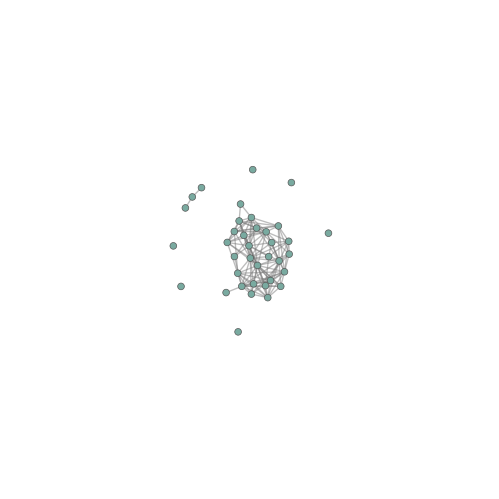

In [8]:
from netwulf import visualize

visualize(eliteFromAdjacency)

In [7]:
from ipysigma import Sigma

Sigma(eliteFromAdjacency)

Sigma(nx.Graph with 37 nodes and 135 edges)

Veamos los casos de UCINET y GEPHI, a continuación.





3. Visualización de la red:
Una vez que has importado los datos, puedes visualizar tu red utilizando el software NetDraw incluido con UCINET.
• Para hacer esto, ve a Network > Visualize with NetDraw. En NetDraw, puedes modificar la apariencia de la red ajustando las opciones de color, tamaño, forma y etiqueta.
4. Análisis de la red:
UCINET ofrece una variedad de análisis de red, incluyendo medidas de centralidad, subgrupos, equivalencia estructural, entre otros.
• Por ejemplo, para calcular la centralidad de grado (degree centrality), ve a Network > Centrality > Degree..., selecciona la red que quieres analizar y luego presiona el botón Run. Los resultados se abrirán en una nueva ventana.
5. Exportar resultados:
Finalmente, puedes exportar tus resultados para su posterior análisis o presentación.
• Para hacerlo, ve a File > Save As... y elige el formato de archivo deseado.
Con UCINET se puede realizar una variedad de análisis de red. Es recomendable explorar la documentación de UCINET.
Página Web https://sites.google.com/site/ucinetsoftware/home

## **GEPHI**

Gephi es un software de visualización y exploración de redes, de código abierto y gratuito. Se utiliza para análisis de redes sociales, análisis de enlaces, biología, análisis de sistemas y diversos otros campos que involucran redes complejas. Es una poderosa herramienta para aquellos que buscan extraer y entender la información oculta en los datos de la red.
Las principales características de Gephi incluyen:
a. Visualización: Gephi permite a los usuarios visualizar redes y datos de gráficos en formas significativas, utilizando colores, tamaños y varias formas para representar diferentes atributos y propiedades de los nodos y aristas.
b. Diseño: Gephi incorpora algoritmos de diseño que ayudan a mejorar la representación visual de redes complejas, permitiendo que las estructuras subyacentes sean más fácilmente identificables.
c. Métricas: Gephi proporciona un conjunto completo de funciones de análisis de redes, incluyendo medidas de centralidad (grado, cercanía, intermediación), detección de comunidades, y más.
d. Manipulación de datos: Gephi permite importar y exportar datos en una variedad de formatos, así como también filtrar, ordenar y explorar los datos de la red.
e. Dinámica: Gephi también puede manejar redes dinámicas, lo que significa que puede representar redes que cambian con el tiempo, y proporciona una serie de herramientas para analizar y visualizar la evolución de las redes a lo largo del tiempo.
Gephi está diseñado para ser intuitivo y fácil de usar, incluso para aquellos sin una formación técnica o de programación. Al mismo tiempo, es lo suficientemente potente como para ser utilizado por investigadores y científicos de datos para análisis en profundidad.
Página Web https://gephi.org/
1. Instalación de Gephi:
Primero necesitarás tener Gephi instalado en tu computadora. Puedes descargarlo desde el sitio web oficial de Gephi y seguir las instrucciones de instalación.
2. Importar datos:
Después de abrir Gephi, el primer paso es importar los datos que quieres analizar.
• Para importar datos, ve a File > Open... y selecciona el archivo que deseas importar.
3. Explorar el gráfico:
Una vez que has importado los datos, puedes explorar tu red en el área de gráficos.
• Ajusta el tamaño y la apariencia de los nodos y las aristas en la pestaña Appearance.
• Puedes también mover los nodos y aristas manualmente para mejorar la visualización.
4. Análisis de la red:
Gephi ofrece una variedad de análisis de red, incluyendo medidas de centralidad, modularidad, detección de comunidades, entre otros.
• Por ejemplo, para calcular la centralidad de grado (degree centrality), ve a la pestaña Statistics y selecciona Average Degree. Luego, presiona el botón Run.
• Para visualizar la estructura comunitaria, ejecuta el algoritmo de Modularity.
5. Visualización de la red:
Después de realizar el análisis de red, puedes mejorar aún más la visualización de la red.
• Por ejemplo, puedes codificar por colores los nodos según sus atributos, como la centralidad de grado o la pertenencia a la comunidad.
6. Exportar gráfico:
Finalmente, puedes exportar tu gráfico para su posterior análisis o presentación.
• Para hacer esto, ve a File > Export > Graph... o File > Export > SVG/PNG/PDF... y elige el formato de archivo deseado.
Gephi es una herramienta que permite una variedad de análisis de red. Es recomendable explorar la documentación de Gephi.